<a href="https://colab.research.google.com/github/Abdullahkitchlew/Machine-Learning/blob/main/Spam_Emails_ML_Task_Abdullah_Riaz_Kitchlew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Email becomes a powerful tool for communication as it saves a lot of time and cost. It is one of the most popular and secure medium for online transferring and communication messages or data through the web. But, due to the social networks, most of the emails contain unwanted information which is called spam. To identify such spam email is one of the important challenges.
In this project we will use PYTHON text classification technique to identify or classify email spam message. We will find accuracy, time and error rate by applying suitable algorithms (such as NaiveBayes, NaiveBayesMultinomial and J48 etc.) on Email Dataset and we will also compare which algorithm is best for text classification.
Functional Requirements:
Administrator will perform all these tasks.
1. Collect Data Set
• Gathering the data for Email spam contains spam and non-spam messages
2. Pre-processing
• As most of the data in the real world are incomplete containing noisy and missing values.
Therefore we have to apply Pre-processing on your data.
3. Feature Selection
• After the pre-processing step, we apply the feature selection algorithm, the algorithm which deploy here is Best First Feature Selection algorithm.
4. Apply Spam Filter Algorithms.
• Handle Data: Load the dataset and split it into training and test datasets.
• Summarize Data: summarize the properties in the training dataset so that we can calculate probabilities and make predictions.
• Make a Prediction: Use the summaries of the dataset to generate a single prediction.
• Make Predictions: Generate predictions given a test dataset and a summarized training
dataset.
• Evaluate Accuracy: Evaluate the accuracy of predictions made for a test dataset as the
percentage correct out of all predictions made.
5. Train & Test Data
• Split data into 70% training & 30% testing data sets.
6. Confusion Matrix
• Create a confusion matrix table to describe the performance of a classification model.
7. Accuracy
• Find Accuracy of all algorithm and compare.

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 	#converting text data to feature vectors (numerical values
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Data Collection & Pre-Processing

In [ ]:

raw_mail_data = pd.read_csv('/content/mail_data.csv')

print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# number of rows and columns in the dataframe
mail_data.shape


(5572, 2)

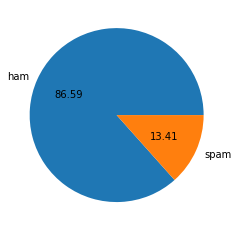

In [ ]:
import matplotlib.pyplot as plt
plt.pie(mail_data['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

Label Encoding


In [ ]:
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0

mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

Spam - 0, Ham - 1


In [ ]:
X = mail_data['Message']

Y = mail_data['Category']

In [ ]:
print(X)


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Splitting the data into training data & test data and Spam Filter Algorithm



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

# Split data into 70% training & 30% testing data sets - SPECIFIED

print(X.shape)
print(X_train.shape)
print(X_test.shape)


(5572,)
(3900,)
(1672,)


Feature Extraction

In [ ]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')
#print(X_train)
print(X_train_features)


  (0, 3651)	0.3587221851838313
  (0, 3086)	0.2739938546908377
  (0, 2825)	0.27449571589502497
  (0, 5509)	0.40335109063478575
  (0, 1799)	0.3212783541487352
  (0, 2489)	0.5022955611445961
  (0, 1965)	0.45020567466160955
  (1, 4242)	0.25454751074340237
  (1, 4277)	0.33272056276910283
  (1, 3821)	0.2433861866561607
  (1, 6813)	0.2600994552195357
  (1, 6)	0.33272056276910283
  (1, 6147)	0.16521313463046028
  (1, 2058)	0.18864352312402063
  (1, 3671)	0.16295245094503386
  (1, 1153)	0.31698956000242107
  (1, 3875)	0.19423188001633226
  (1, 3534)	0.33272056276910283
  (1, 3451)	0.1449316171395763
  (1, 4271)	0.19008955732757765
  (1, 6331)	0.33272056276910283
  (1, 3003)	0.2841165834640824
  (2, 5099)	0.30299688346739717
  (2, 6545)	0.19459812997829923
  (2, 4225)	0.30299688346739717
  :	:
  (3897, 2908)	0.32603177409174644
  (3897, 4271)	0.2690692327260679
  (3898, 2081)	0.3654387356575668
  (3898, 3632)	0.3140198944936123
  (3898, 6590)	0.3055286729595858
  (3898, 3587)	0.3117604480135819


Training the Model

In [ ]:
model = LogisticRegression()

# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

Evaluating the trained model

In [ ]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9661538461538461


In [ ]:

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9647129186602871


Building a Predictive System

In [ ]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


Confusion Matrix

In [ ]:
print(confusion_matrix(Y_train, prediction_on_training_data))

[[ 385  130]
 [   2 3383]]


In [ ]:
print(confusion_matrix(Y_test, prediction_on_test_data))

[[ 174   58]
 [   1 1439]]
